#📌 Extracción

Se agrega el url del JSON para cargarlo con la librería pandas y se guarda la información en la variable datos para poder manipularlo.

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)

datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Se normalizan los datos.
Se normalizan los datos para las columnas que estan anidadas y se genera un nuevo DataFrame.

In [216]:
columnas = ['customer', 'phone', 'internet', 'account']
datosNormalizado = datos[['customerID', 'Churn']]

for col in columnas:
  colNormalizada = pd.json_normalize(datos[col])
  datosNormalizado = pd.concat([datosNormalizado, colNormalizada], axis=1)

In [217]:
datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [218]:
datosNormalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Se verifica que el DF no contenga ningun valor nulo.

In [219]:
datosNormalizado.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## Se cambia el nombre de las columnas y su tipo.
Se cambia el nombre de las columnas y su tipo para que sea mas facil de manipular en el analisis.

In [220]:
datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [221]:
datosNormalizado = datosNormalizado.rename(columns={'Charges.Monthly':'ChargesMonthly'})
datosNormalizado['ChargesMonthly'] = pd.to_numeric(datosNormalizado['ChargesMonthly'], errors='coerce')
datosNormalizado = datosNormalizado.rename(columns={'Charges.Total':'ChargesTotal'})
datosNormalizado['ChargesTotal'] = pd.to_numeric(datosNormalizado['ChargesTotal'], errors='coerce')
datosNormalizado['ChargesTotal'] = datosNormalizado['ChargesTotal'].fillna(0)

datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [222]:
datosNormalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [223]:
datosNormalizado = datosNormalizado.rename(columns={'customerID':'CustomerID'})
datosNormalizado = datosNormalizado.rename(columns={'gender':'Gender'})
datosNormalizado = datosNormalizado.rename(columns={'tenure':'Tenure'})

datosNormalizado.sample(10)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
2045,2882-DDZPG,No,Female,0,No,No,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45
5081,6942-LBFDP,No,Female,0,No,No,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.55,33.60
7249,9968-FFVVH,No,Male,0,No,No,63,Yes,Yes,DSL,...,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
4907,6710-HSJRD,No,Male,0,Yes,No,61,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,114.10,7132.15
589,0840-DFEZH,No,Female,0,No,No,7,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,564.65
333,0485-ZBSLN,No,Male,0,Yes,Yes,65,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1715.10
4369,5993-BQHEA,No,Male,0,No,No,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,267.00
2242,3132-TVFDZ,Yes,Male,1,Yes,No,57,No,No phone service,DSL,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.85,2572.95
434,0621-CXBKL,No,Female,0,No,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70
3650,5028-GZLDO,Yes,Male,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),70.70,140.70


## Se verifican duplicados.
Se verifica que el id del cliente no este duplicado ya que en la base de datos debe ser unico.

In [224]:
datosNormalizado[datosNormalizado.duplicated(subset='CustomerID', keep=False)]

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


## Se verifican valores unicos.
Se realiza un chequeo de las columnas object para verificar valores unicos y asegurarnos de que no hay datos incorrectos o no necesarios que puedan afectar el analisis.

In [225]:
for col in datosNormalizado.columns:
  if datosNormalizado[col].dtype == 'object' and col != 'CustomerID' :
    print(f"Valores unicos en la columna '{col}':")
    print(datosNormalizado[col].unique())
    print()

Valores unicos en la columna 'Churn':
['No' 'Yes' '']

Valores unicos en la columna 'Gender':
['Female' 'Male']

Valores unicos en la columna 'Partner':
['Yes' 'No']

Valores unicos en la columna 'Dependents':
['Yes' 'No']

Valores unicos en la columna 'PhoneService':
['Yes' 'No']

Valores unicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores unicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores unicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'Contract':
['One year' 'Month-to-month'

Se observa que Churn(clientes vigentes) cuenta con valores vacios por lo que es necesario borrar esas filas ya que no se sabe si es un cliente vigente y no se ocupan para el analisis.

In [226]:
datosNormalizado = datosNormalizado[datosNormalizado['Churn'] != '']

In [227]:
for col in datosNormalizado.columns:
  if datosNormalizado[col].dtype == 'object' and col != 'CustomerID' :
    print(f"Valores unicos en la columna '{col}':")
    print(datosNormalizado[col].unique())
    print()

Valores unicos en la columna 'Churn':
['No' 'Yes']

Valores unicos en la columna 'Gender':
['Female' 'Male']

Valores unicos en la columna 'Partner':
['Yes' 'No']

Valores unicos en la columna 'Dependents':
['Yes' 'No']

Valores unicos en la columna 'PhoneService':
['Yes' 'No']

Valores unicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores unicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores unicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'Contract':
['One year' 'Month-to-month' 'T

## Se crea la columna adicional.

In [228]:
datosNormalizado['DailyCharges'] = datosNormalizado['ChargesMonthly'] / 30

datosNormalizado.sample(8)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,DailyCharges
2862,3969-JQABI,No,Female,0,Yes,No,58,Yes,No,DSL,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),65.25,3791.60,2.175000
1946,2754-VDLTR,Yes,Male,0,No,Yes,10,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.20,930.40,3.173333
2924,4065-JJAVA,No,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,49.50,49.50,1.650000
2809,3893-JRNFS,No,Male,0,No,No,68,No,No phone service,DSL,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),39.90,2796.35,1.330000
1594,2266-FUBDZ,No,Male,0,Yes,Yes,15,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,278.85,0.645000
99,0164-APGRB,No,Female,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,3.830000
5832,7977-HXJKU,No,Male,0,No,Yes,21,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,397.00,0.653333
494,0699-NDKJM,No,Female,0,Yes,No,57,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),58.75,3437.45,1.958333


## Se guarda el DataFrame en un archivo CSV.

En esta etapa se guarda el DF que ya se limpio de incoherencias e inconsistencias.

In [229]:
datosNormalizado.to_csv('TelecomX_Data_Procesado.csv', index=False)

#📊 Carga y análisis

## Análisis descriptivo.

Se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [230]:
datosNormalizado.describe()

,SeniorCitizen,Tenure,ChargesMonthly,ChargesTotal,DailyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Grafica de clientes vigentes.
Se crea una grafica para ver el porcentaje de clientes vigentes y no vigentes.

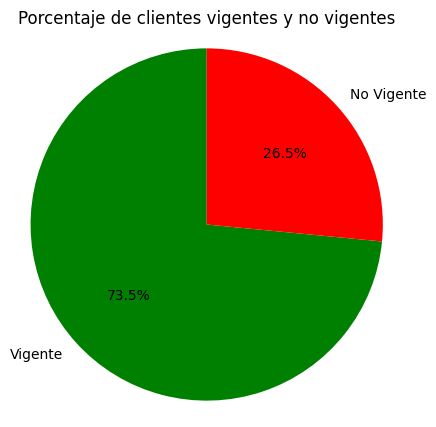

In [231]:
valoresVigentes = datosNormalizado['Churn'].value_counts()
labels = ['Vigente', 'No Vigente']

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(valoresVigentes, labels=labels, autopct='%1.1f%%', colors = ['green', 'red'], startangle=90)
ax.axis('equal')

plt.title('Porcentaje de clientes vigentes y no vigentes')
plt.show()

## Analisis de evasion por variable categorica.

### Vigentes por genero.

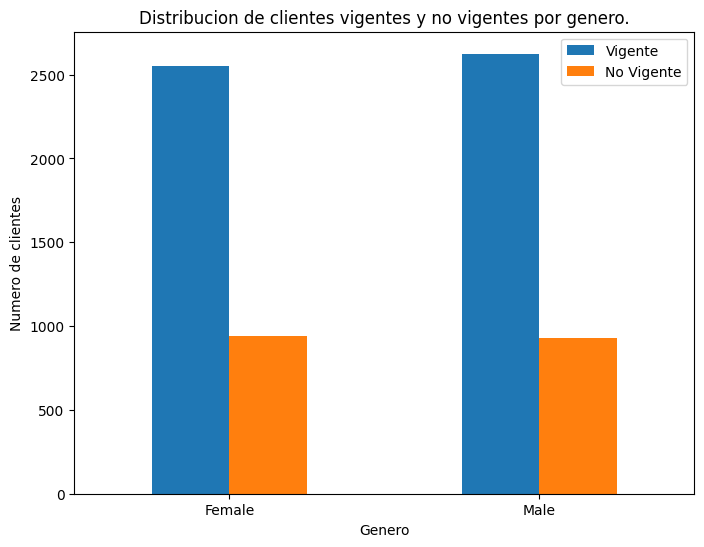

In [232]:
vigentesGenero = datosNormalizado.groupby(['Gender', 'Churn']).size().unstack()

ax = vigentesGenero.plot(kind='bar', figsize=(8, 6), rot=0)
ax.set_title('Distribucion de clientes vigentes y no vigentes por genero.')
ax.set_xlabel('Genero')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por contrato.

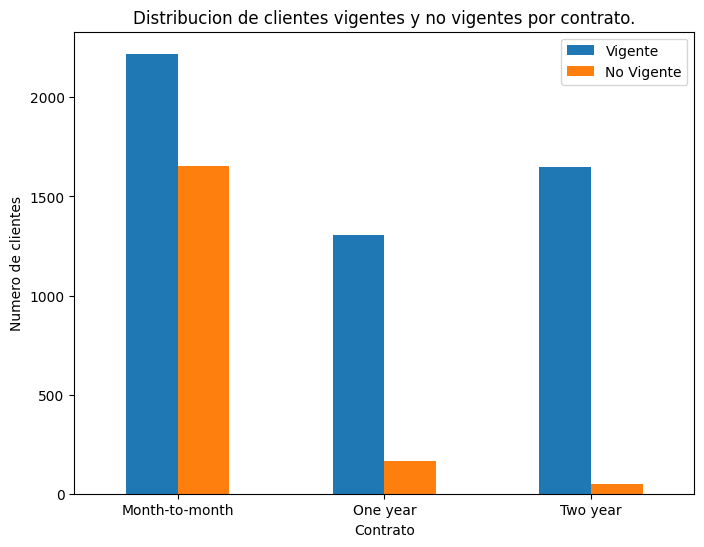

In [233]:
vigentesContrato = datosNormalizado.groupby(['Contract', 'Churn']).size().unstack()

ax = vigentesContrato.plot(kind='bar', figsize=(8, 6), rot=0)
ax.set_title('Distribucion de clientes vigentes y no vigentes por contrato.')
ax.set_xlabel('Contrato')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.savefig('grafico_vigentes_por_contrato.png')

plt.show()

### Vigentes por metodo de pago.

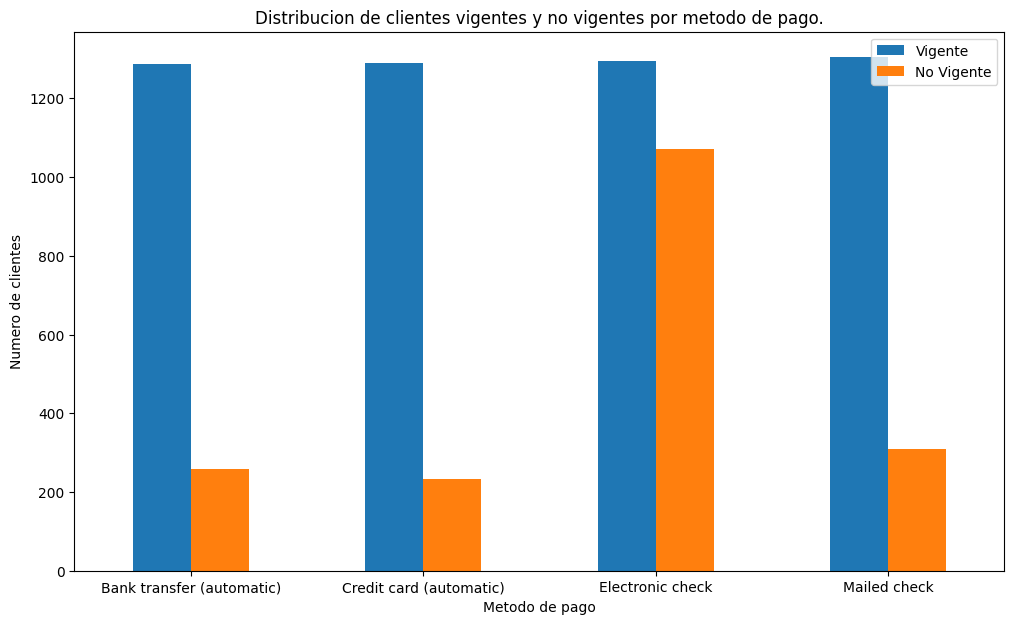

In [241]:
vigentesMetodopago = datosNormalizado.groupby(['PaymentMethod', 'Churn']).size().unstack()

ax = vigentesMetodopago.plot(kind='bar', figsize=(12, 7), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por metodo de pago.')
ax.set_xlabel('Metodo de pago')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.savefig('grafico_vigentes_por_metododepago.png')

plt.show()

### Vigentes por edad (igual o mayor a 65 años).

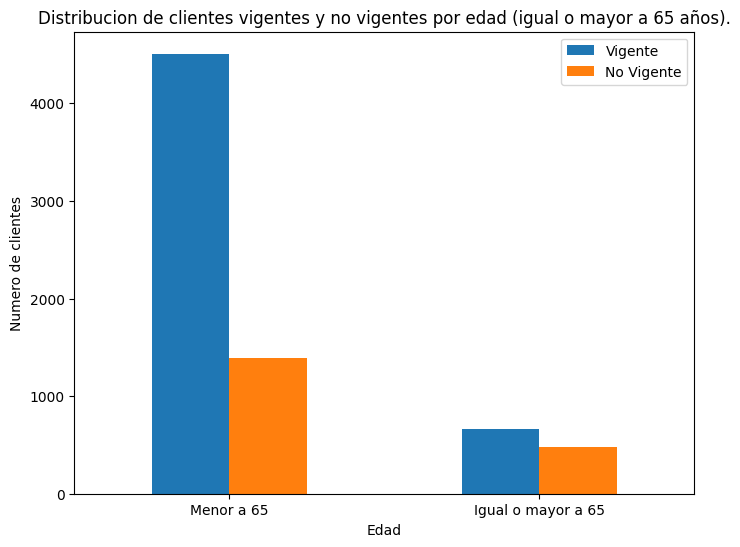

In [235]:
vigentesEdad = datosNormalizado.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = vigentesEdad.plot(kind='bar', figsize=(8, 6), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por edad (igual o mayor a 65 años).')
ax.set_xlabel('Edad')
ax.set_xticklabels(['Menor a 65', 'Igual o mayor a 65'])
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por servicio de internet.

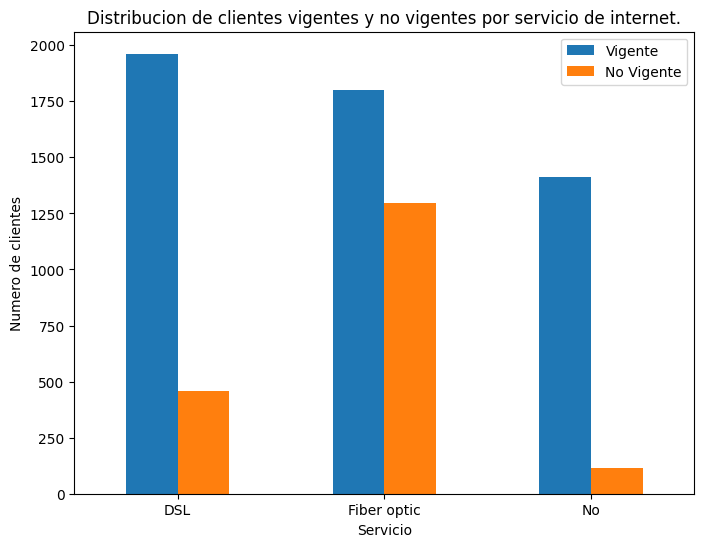

In [245]:
vigentesInternet = datosNormalizado.groupby(['InternetService', 'Churn']).size().unstack()

ax = vigentesInternet.plot(kind='bar', figsize=(8, 6), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por servicio de internet.')
ax.set_xlabel('Servicio')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.savefig('grafico_vigentes_por_serviciodeinternet.png')

plt.show()

### Clientes vigentes por servicio de internet y telefono.

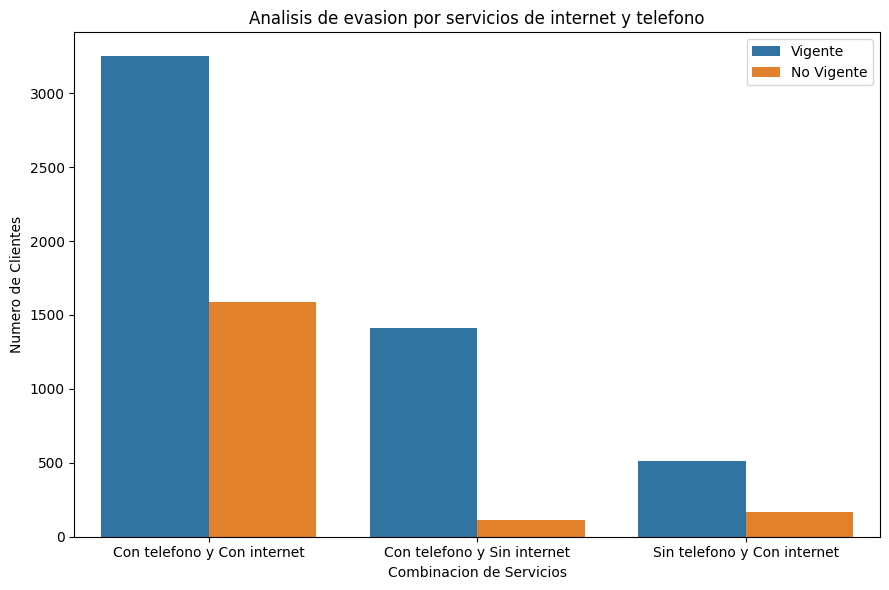

In [237]:
dfTemporal = datosNormalizado.copy()

dfTemporal['ServicioTelefono'] = dfTemporal['PhoneService'].map({'Yes': 'Con telefono', 'No': 'Sin telefono'})
dfTemporal['ServicioInternet'] = dfTemporal['InternetService'].map({
    'Fiber optic': 'Con internet',
    'DSL': 'Con internet',
    'No': 'Sin internet'
})

dfTemporal['Servicios'] = (dfTemporal['ServicioTelefono'] + ' y ' + dfTemporal['ServicioInternet'])

plt.figure(figsize=(9, 6))
sns.countplot(data=dfTemporal, x='Servicios', hue='Churn', order=dfTemporal['Servicios'].value_counts().index)
plt.title('Analisis de evasion por servicios de internet y telefono')
plt.xlabel('Combinacion de Servicios')
plt.ylabel('Numero de Clientes')
plt.legend(labels=['Vigente', 'No Vigente'])

plt.tight_layout()
plt.show()

## Analisis de evasión por variables numéricas

### Evasion por tiempo de contrato.

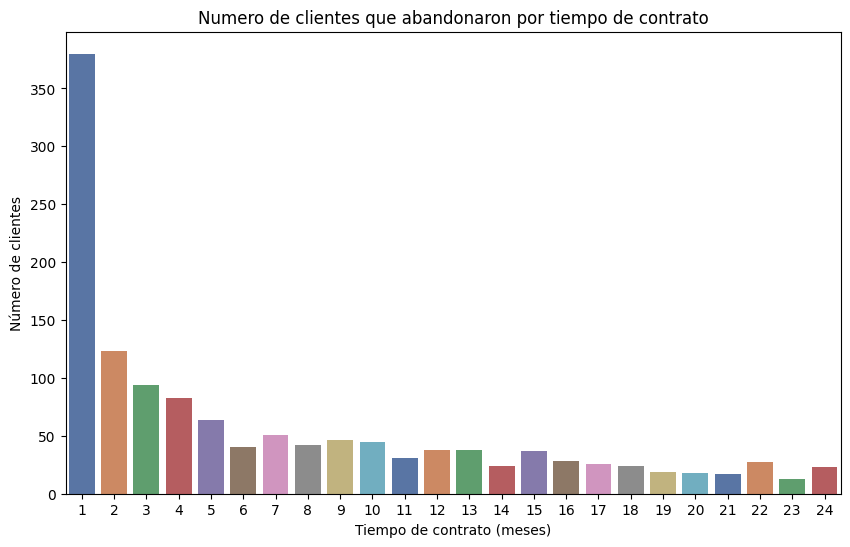

In [242]:
abandonoMeses = datosNormalizado[(datosNormalizado['Churn'] == 'Yes') & (datosNormalizado['Tenure'] <= 24)]

plt.figure(figsize=(10, 6))
sns.countplot(data=abandonoMeses, x='Tenure', hue='Tenure', palette='deep', legend=False)
plt.title('Numero de clientes que abandonaron por tiempo de contrato')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Número de clientes')

plt.savefig('grafico_evasion_por_tiempodecontrato.png')

plt.show()

### Evasion de clientes por cargos al mes.

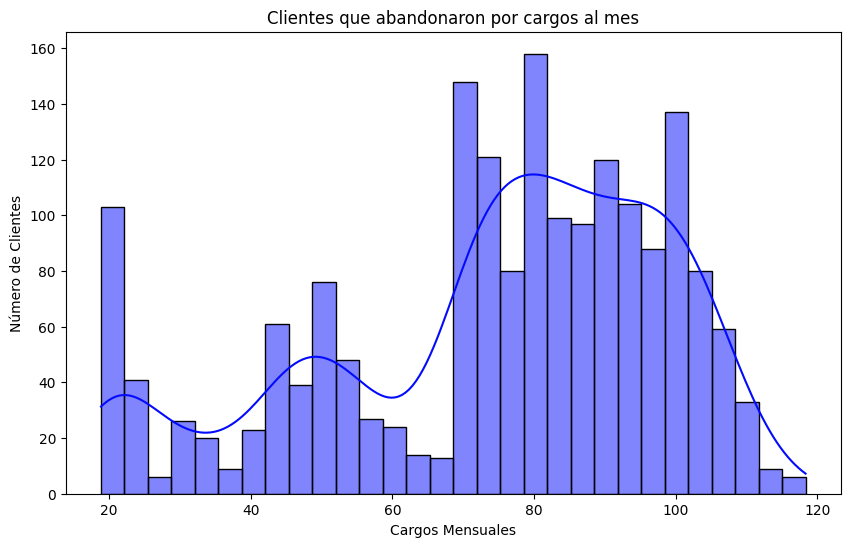

In [243]:
clientesAbandonaron = datosNormalizado[datosNormalizado['Churn'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.histplot(data=clientesAbandonaron, x='ChargesMonthly', bins=30, kde=True, color='#030bfc')
plt.title('Clientes que abandonaron por cargos al mes')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Número de Clientes')

plt.savefig('grafico_evasion_por_cargosalmes.png')

plt.show()

### Evasion de clientes por cargos totales.

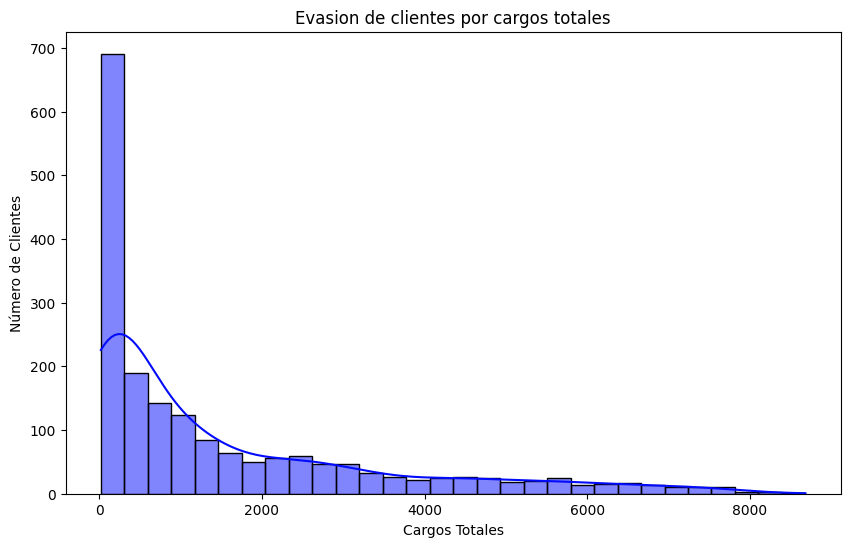

In [244]:
clientesAbandonaron = datosNormalizado[datosNormalizado['Churn'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.histplot(data=clientesAbandonaron, x='ChargesTotal', bins=30, kde=True, color='#030bfc')
plt.title('Evasion de clientes por cargos totales')
plt.xlabel('Cargos Totales')
plt.ylabel('Número de Clientes')

plt.savefig('grafico_evasion_por_cargostotales.png')

plt.show()

# 📄Informe final

## Herramientas

Para realizar este análisis se usaron las siguientes librerías:

*   Pandas
*   Matplotlib
*   Seaborn
*   Numpy

## Introducción

El propósito de este informe es hacer un análisis para identificar la perdida de clientes. Para ello se usaran las técnicas que se mostraron en el módulo que ayudaran a detectar patrones claves y diseñar estrategias que sean efectivas para la retención de los clientes.

## Limpieza y Tratamiento de Datos

Primero se exportó el set de datos, el cual es un archivo JSON que está alojado en el link de GitHub que se definió en la variable '**url**'. Después se pasó a la función '**read_json**' y se almacenó en la variable 'datos' para su manipulación.

Para asegurarnos que el set de datos este listo para ser trabajado se tiene que realizar un tratamiento para que al analizarlo no se presente ninguna incoherencia o inconsistencia. Esta lista contiene los pasos que se llevaron a cabo:

*   Se normalizaron los datos en las columnas que tienen la información anidada y se concatenó en un nuevo DataFrame nombrado '**datosNormalizado**'.
*   Se verifica que no haya valores nulos en las columnas para evitar que afecte la precisión del análisis.
*   Se cambiaron los nombres de las columnas y su tipo para que sea más accesible y fácil de entender.
*   Se verifica que no haya ningún cliente duplicado, ya que el id es único.
*   Se crea una columna adicional para los cargos diarios. Se tomó la columna de cargos mensuales y se dividió entre 30 para obtener el valor diario.
*   Finalmente se guardó el set de datos procesados en un CSV.

## Análisis Exploratorio de Datos

Despues de realizar el analisis del set de datos sobre la evasion de clientes, estos son algunos de los graficos relevantes que se obtuvieron que ayudaron a detectar patrones sobre la evasion:

1. Evasion por contrato: <br><img src="https://drive.google.com/uc?id=1yHZwJDcABD6HvNNVVo_Pi81LhYPbzyP7" width="500"><br>
Se puede observar que los clientes que tienen contratos mensuales suelen ser lo que abandonan y para los de un año a dos se reduce.
2. Evasion por metodo de pago: <br><img src="https://drive.google.com/uc?id=1Bzko9_TeKrW1PSYpk-amSErdDhGpYRyF" width="600"><br>
Se observa que los clientes con metodo de pago por transferencia, tarjeta de credito y por correo se mantienen vigentes. Por otro lado, los clientes con cheques electronicos abandonan.
3. Evasion por servicio de internet: <br><img src="https://drive.google.com/uc?id=15hq820-IrrozrQ2LaW6A5S4weCd9F9LB" width="600"><br>
Al observar la grafica se puede ver que hay una gran cantidad de abandonos al usar el servicio de fibra optica, es decir, la gente se siente mas comoda con el servicio de internet DSL.
4. Evasion de clientes por tiempo de contrato: <br><img src="https://drive.google.com/uc?id=1TszXLVqqPlNq5ZlHp5zsRqrdue26AZ4s" width="600"><br>
Al analizar el tiempo de contrato se puede ver que los clientes antes de los 12 años tienden a abondonar. Despues del año se reduce lo que muestra mayor fidelidad.
5. Evasion de clientes por cargos totales: <br><img src="https://drive.google.com/uc?id=1jN8LoBDPIJp9IaG315fjHswl9jL5VaIc" width="600"><br>
Se puede observar que hay una gran concentración de clientes que se fueron con un cargo total muy bajo, cercano a 0, lo cual puede indicar que abandonaron poco después de empezar el servicio.


## Conclusiones e Insights

Se puede concluir que:

*   Los clientes muestran mayor fidelidad en contratos mayor a un año.
*   Los clientes prefieren los métodos de pago por transferencia, pago con crédito y por correo.
*   Los clientes prefieren el servicio de internet DSL.
*   Los clientes con un tiempo de contrato menor a 12 meses tienden a abandonar.
*   Los clientes suelen abandonar poco después de empezar el servicio.



## Recomendaciones

Después de terminar con el análisis se recomiendan las siguientes estrategias:

1.   Mejorar los contratos anuales con beneficios y descuentos.
2.   Implementar promociones de paquetes de internet con el servicio DSL.
3.   Implementar ideas para retener a los clientes vigentes con tiempo de contrato menor a 12 meses.
4.   Eliminar el uso de cheques electrónicos e implementar el uso de pagos por transferencia y con crédito.
5.   Agregar programas de fidelización para clientes con antigüedad.

